In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from itertools import product
import os
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import numpy as np
import cv2
from math import ceil
from skimage import data, color, feature

from lol_plot import read_image_path, IMAGE_PATHS, extract_edges
from lol_plot import plot_screen, plot_health_bars, plot_edges
from lol_plot import LEFT_SIZE, TOP_SIZE, RIGHT_SIZE, BOT_SIZE, HB_HEIGHT, HB_WIDTH
from lol_plot import scatter_edges_map

In [3]:
al, at, ar, ab = [[], [], [], []]  # all left, all top, ...
for image_path in IMAGE_PATHS[:-1]:
    image, health_bars_save_path, df_health_bars = read_image_path(image_path)
    assert df_health_bars is not None
    el, et, er, eb = extract_edges(image, df_health_bars)
    al.extend(el)
    at.extend(et)
    ar.extend(er)
    ab.extend(eb)

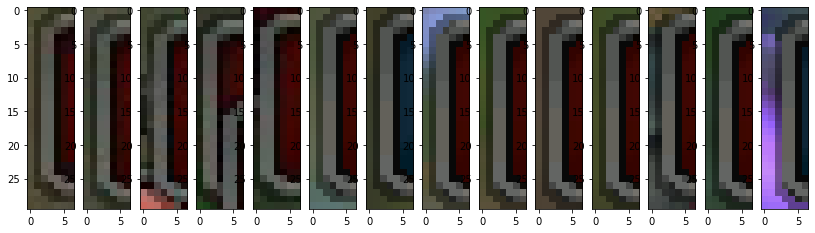

In [4]:
plot_edges(al)

In [5]:
# hasher = cv2.img_hash.MarrHildrethHash_create()
hasher = cv2.img_hash.BlockMeanHash_create(cv2.img_hash.BLOCK_MEAN_HASH_MODE_0)
# hasher = cv2.img_hash.BlockMeanHash_create(cv2.img_hash.BLOCK_MEAN_HASH_MODE_1)
# hasher = cv2.img_hash.ColorMomentHash_create()
# hasher = cv2.img_hash.PHash_create()

In [6]:
correct_edges = al
ref_edges = ar
other_edges = at + ab
# other_edges = at

In [7]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
model = Isomap(n_components=2)
# model = PCA(n_components=2)

correct_hash (14, 32)
ref_hash (16, 32)
other_edges (29, 32)


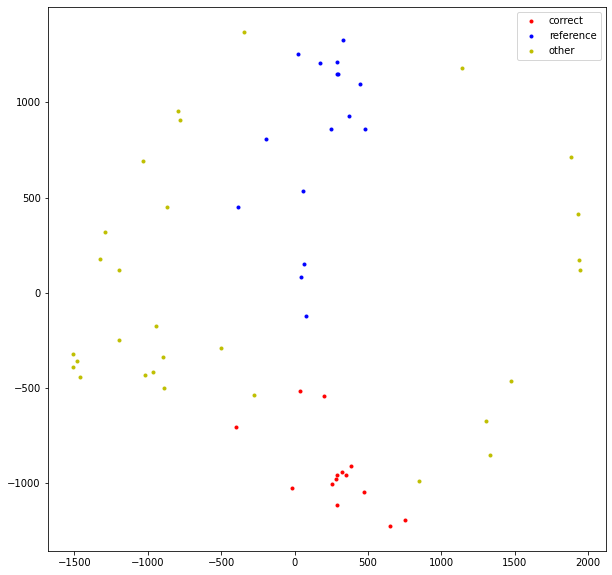

In [8]:
scatter_edges_map(correct_edges, ref_edges, other_edges, hasher, model)

In [9]:
# correct_distances = np.array([hasher.compare(h1, h2) for h1, h2 in product(base_hash, base_hash)])
# correct_distances[correct_distances != 0].mean()

# wrong_distances = np.array([hasher.compare(h1, h2) for h1, h2 in product(base_hash, ref_hash)])
# wrong_distances.mean()